In [1]:
# p43 (p64 PDF) 

%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

c:\Users\duyni\Documents\Learn-Quantum-Computing-with-Python-and-IBM-Quantum-Experience\quantum_env\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


# Chapter 12 - Qiskit Aqua

In [2]:
# p338 (p359 PDF) 

from qiskit.aqua.components.initial_states import Custom
init_state_0 = Custom(num_qubits=3, state='zero')
init_state_uniform = Custom(num_qubits=3, state='uniform')
init_state_random = Custom(num_qubits=3, state='random')


In [3]:
# p338 (p359 PDF) 

qc0 = init_state_0.construct_circuit(mode='circuit')
qc0.draw()


q_0: 
     
q_1: 
     
q_2:

In [4]:
# p338 (p359 PDF) 

qc1 = init_state_uniform.construct_circuit(mode='circuit')
qc1.draw()


┌──────────┐
q_0: ┤ U2(0,pi) ├
     ├──────────┤
q_1: ┤ U2(0,pi) ├
     ├──────────┤
q_2: ┤ U2(0,pi) ├
     └──────────┘

In [5]:
# p339 (p360 PDF) 

qc2 = init_state_random.construct_circuit(mode='circuit')
qc2.draw()


┌────────────────┐                               ┌───┐┌─────────────────┐»
q_0: ┤ U3(1.6927,0,0) ├───────────────────────────────┤ X ├┤ U3(-0.1817,0,0) ├»
     ├────────────────┤┌───┐┌───────────────────┐┌───┐└─┬─┘└─────────────────┘»
q_1: ┤ U3(1.3855,0,0) ├┤ X ├┤ U3(-0.090911,0,0) ├┤ X ├──■─────────────────────»
     ├────────────────┤└─┬─┘└───────────────────┘└─┬─┘                        »
q_2: ┤ U3(1.6424,0,0) ├──■─────────────────────────■──────────────────────────»
     └────────────────┘                                                       »
«     ┌───┐┌─────────────────┐┌───┐┌─────────────────┐┌───┐
«q_0: ┤ X ├┤ U3(0.91183,0,0) ├┤ X ├┤ U3(0.17076,0,0) ├┤ X ├
«     └─┬─┘└─────────────────┘└─┬─┘└─────────────────┘└─┬─┘
«q_1: ──┼───────────────────────■───────────────────────┼──
«       │                                               │  
«q_2: ──■───────────────────────────────────────────────■──
«

In [6]:
# p339 (p360 PDF) 

# Create the quantum circuit
num_qubits = 2
qc = QuantumCircuit(num_qubits)
qc.h(0)
qc.cx(0,1)
# Construct the Custom class based on the built quantum circuit
q_component = Custom(num_qubits=num_qubits, circuit=qc)
q_component.construct_circuit().draw()


┌──────────┐     
q_0: ┤ U2(0,pi) ├──■──
     └──────────┘┌─┴─┐
q_1: ────────────┤ X ├
                 └───┘

In [7]:
# p341 (p362 PDF) 

# Import and create the PyTorchDiscriminator class
from qiskit.aqua.components.neural_networks import PyTorchDiscriminator
# Set the number data input and output dimension to 2.
py_torch_disc = PyTorchDiscriminator(n_features = 2, n_out=2)


NameError: Pytorch is not installed. For installation instructions see https://pytorch.org/get-started/locally/

In [ ]:
# p341 (p362 PDF) 

# Load the discriminator model, implements the torch.load(dir) 
discriminator_model = '/discriminator_model_directory'
py_torch_disc.load_model(discriminator_model)


In [ ]:
# p341 (p362 PDF) 

# Parameters are defined in the Qiskit API as follows: 
###
# data (tuple) – real_batch: torch.Tensor, Training data batch. generated_batch: numpy array, Generated data batch.
# weights (tuple) – real problem, generated problem
# penalty (bool) – Indicate whether or not penalty function is applied to the loss function.
# quantum_instance (QuantumInstance) – Quantum Instance (depreciated)
# shots (int) – Number of shots for hardware or qasm execution. Not used for classical network (only quantum ones)
###
result_dict = PyTorchDiscriminator.train(data, weights, penalty, quantum_instance=quantum_instance, shots=None)


In [8]:
# p343 (p364 PDF) 

# Import the CircuitStateFn class
from qiskit.aqua.operators.state_fns import CircuitStateFn
# Create the quantum circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)


In [9]:
# p343 (p364 PDF) 

# Create the CircuitStateFn class with the quantum circuit
csf = CircuitStateFn(primitive=qc, coeff=1, is_measurement=False)
print(csf)


CircuitStateFn(
     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
)


In [10]:
# p344 (p365 PDF) 

# Create a second quantum circuit with same width and operators
qc2 = QuantumCircuit(2)
qc2.h(0)
qc2.cx(0,1)

# Create the second circuit state function
csf2 = CircuitStateFn(primitive=qc2, coeff=1, is_measurement=False)

# Compare both circuit state functions using the equals operator
print(csf.equals(csf2))


True


In [11]:
# p344 (p365 PDF) 

# Add the two circuit state functions together
added_csf = csf.add(csf2)
print(added_csf)


CircuitStateFn(
     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
) * 2


In [12]:
# p345 (p366 PDF) 

# Create a quantum circuit
qc3 = QuantumCircuit(2) 
qc3.h(0)
qc3.cx(1,0) 
# Create a circuit state function from the quantum circuit
csf3 = CircuitStateFn(primitive=qc3, coeff=1, is_measurement=False)
print(added_csf.add(csf3))


SummedOp([
  CircuitStateFn(
       ┌───┐     
  q_0: ┤ H ├──■──
       └───┘┌─┴─┐
  q_1: ─────┤ X ├
            └───┘
  ) * 2,
  CircuitStateFn(
       ┌───┐┌───┐
  q_0: ┤ H ├┤ X ├
       └───┘└─┬─┘
  q_1: ───────■──
                 
  )
])


In [13]:
# p346 (p367 PDF) 

# Import the utils module
from qiskit.aqua import utils 
# convert the number 6 from decimal to binary
binary_value = utils.decimal_to_binary(6, max_num_digits=0)
print('Binary result: ', binary_value)


Binary result:  110.


In [14]:
# p346 (p367 PDF) 

#Random Unitary matrix
random_unitary = utils.random_unitary(N=3)
print('Random Unitary result: \n', random_unitary)


Random Unitary result: 
 [[ 0.46266594+0.09818176j -0.3819174 +0.73700842j  0.00639599+0.29532585j]
 [ 0.30342446+0.56900067j  0.53039264-0.15611927j -0.32215041+0.41797292j]
 [ 0.36060718+0.48003631j  0.07129681+0.01359712j  0.42201603-0.67539763j]]


In [15]:
# p347 (p368 PDF) 

# Create an array of random quantum circuits
from qiskit.circuit.random import random_circuit
quantum_circuits = []
# Append a group of random circuits
for x in range(2):
    quantum_circuits.append(random_circuit(3, 5, measure=True))


In [16]:
# p347 (p368 PDF) 

# Obtain and print a summary of all the quantum circuits
circuits_summary = utils.summarize_circuits(quantum_circuits)
print(circuits_summary)


Submitting 2 circuits.
0-th circuit: 3 qubits, 3 classical bits and 15 operations with depth 6
op_counts: OrderedDict([('measure', 3), ('rx', 2), ('cu1', 1), ('sdg', 1), ('u2', 1), ('ry', 1), ('ccx', 1), ('u1', 1), ('tdg', 1), ('rz', 1), ('id', 1), ('h', 1)])
1-th circuit: 3 qubits, 3 classical bits and 13 operations with depth 6
op_counts: OrderedDict([('measure', 3), ('z', 2), ('cu1', 1), ('sdg', 1), ('ccx', 1), ('cz', 1), ('cy', 1), ('y', 1), ('u1', 1), ('ry', 1)])
Average: 3.00 qubits, 3.00 classical bits and 14.00 operations with depth 6.00



In [17]:
# p348 (p369 PDF) 

# Fully entangled coupling map
full_coupling_map = utils.get_entangler_map(map_type="full", num_qubits=5)
print('Full coupling map: ', full_coupling_map) 


Full coupling map:  [[0, 1], [0, 2], [0, 3], [0, 4], [1, 2], [1, 3], [1, 4], [2, 3], [2, 4], [3, 4]]


In [18]:
# p348 (p369 PDF) 

# Linearly entangled coupling map
lin_coupling_map = utils.get_entangler_map(map_type="linear", num_qubits=5)
print('Full coupling map: ', lin_coupling_map)


Full coupling map:  [[0, 1], [1, 2], [2, 3], [3, 4]]


In [19]:
# p348 (p369 PDF) 

# Validate entangled coupling maps
result = utils.validate_entangler_map(entangler_map=full_coupling_map, num_qubits=5, allow_double_entanglement=True)
print(result)


[[0, 1], [0, 2], [0, 3], [0, 4], [1, 2], [1, 3], [1, 4], [2, 3], [2, 4], [3, 4]]


In [20]:
# p349 (p370 PDF) 

# Import NumPy to create the array
import numpy as np

# Generate a 2x3 (NxD) array
dim_map = np.array( [[ 0,1,0], [ 1,0,1]])
# Reduce the D from 3 to 2, resulting in a 2x2 dimensional array
reduced_dim = utils.reduce_dim_to_via_pca(x=dim_map, dim=2)
print(reduced_dim)


[[ 8.66025404e-01  3.92523115e-17]
 [-8.66025404e-01  3.92523115e-17]]


In [21]:
# p351 (p372 PDF) 

# Import the necessary modules and classes
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import Grover, DeutschJozsa, BernsteinVazirani, Simon
from qiskit.aqua.components.oracles import LogicalExpressionOracle, TruthTableOracle, CustomCircuitOracle

# State the SAT problem into a logical expression
# A = Sophia, B = Angelina, C = Leo, D = Lex
expression = '((A ^ B) & (C & D) & ~(A & C))'


In [22]:
# p352 (p373 PDF) 

# Create an Oracle based on the Logical Expression
oracle = LogicalExpressionOracle(expression)


In [23]:
# p352 (p373 PDF)

# Construct the circuit from the oracle
quantum_circuit = oracle.construct_circuit()
quantum_circuit.draw()


┌───┐      ┌───┐
v_0: ┤ X ├──■───┤ X ├
     └───┘  │   └───┘
v_1: ───────■────────
            │        
v_2: ───────■────────
            │        
v_3: ───────■────────
          ┌─┴──┐     
o_0: ─────┤0   ├─────
          │    │     
a_0: ─────┤1 X ├─────
          │    │     
a_1: ─────┤2   ├─────
          └────┘

In [24]:
# p353 (p374 PDF)

# Generate a quantum instance from a simulator
quantum_instance = QuantumInstance(BasicAer.get_backend('qasm_simulator'), shots=1024)


In [25]:
# p353 (p374 PDF)

# Create the Grover algorithm with the Logical Expression Oracle
grover = Grover(oracle)


Top result: 1110


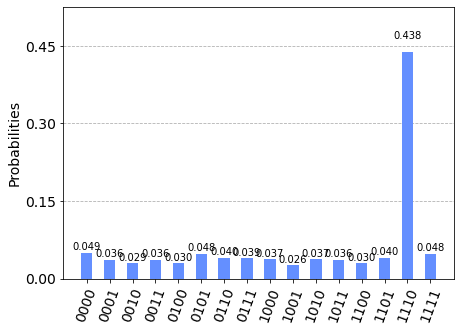

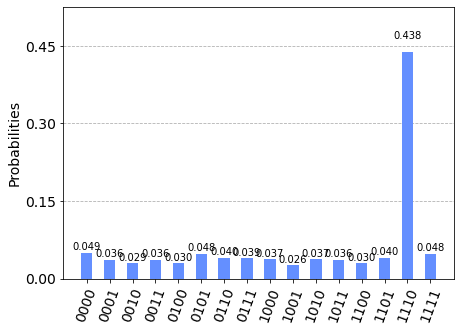

In [26]:
# p353 (p374 PDF)

# Run the Grover algorithm 
result = grover.run(quantum_instance)

# Print the top measured result
print('Top result:', result['top_measurement'])
# Plot all measured results
plot_histogram(result['measurement'])


In [27]:
# p355 (p376 PDF)

# Create the Truth Table expression for constant
truth_table = '1111'

# Create the Truth Table Oracle from the expression
constant_oracle = TruthTableOracle(truth_table)


In [28]:
# p355 (p376 PDF)

# Create Deutsch-Jozsa algorithm
dj = DeutschJozsa(oracle=constant_oracle, quantum_instance=quantum_instance)
# Construct the circuit and draw the result
dj_circuit = dj.construct_circuit(measurement=True)
dj_circuit.draw()


┌───┐      ░                ┌───┐     ┌───┐┌───┐     ┌───┐┌───┐ ░ ┌─┐   
v_0: ┤ H ├──────░───■─────────■──┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├┤ H ├─░─┤M├───
     ├───┤      ░   │  ┌───┐  │  ├───┤  │  ├───┤└───┘  │  ├───┤├───┤ ░ └╥┘┌─┐
v_1: ┤ H ├──────░───■──┤ X ├──■──┤ X ├──■──┤ X ├───────■──┤ X ├┤ H ├─░──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐└───┘┌─┴─┐└───┘┌─┴─┐└───┘     ┌─┴─┐└───┘└───┘ ░  ║ └╥┘
o_0: ┤ X ├┤ H ├─░─┤ X ├─────┤ X ├─────┤ X ├──────────┤ X ├───────────░──╫──╫─
     └───┘└───┘ ░ └───┘     └───┘     └───┘          └───┘           ░  ║  ║ 
m: 2/═══════════════════════════════════════════════════════════════════╩══╩═
                                                                        0  1

In [29]:
# p356 (p377 PDF)

# Run the algorithm on the quantum instance
results = dj.run(quantum_instance)
# Print the results that determines constant or balanced
print(results)


{'measurement': {'00': 1024}, 'result': 'constant'}


In [30]:
# p357 (p378 PDF)

# Create the expression for secret value s: 
# (This ties x1=01, x2=10 XOR with s=11)
s = '0110'

# Create the Truth Table Oracle from the expression
oracle_simon = TruthTableOracle(s) 


In [31]:
# p357 (p378 PDF)

# Create Simon algorithm
simon = Simon(oracle=oracle_simon, quantum_instance=quantum_instance)
simon_circuit = simon.construct_circuit(measurement=True)
simon_circuit.draw()


┌───┐ ░           ┌───┐     ┌───┐ ░ ┌───┐┌─┐   
v_0: ┤ H ├─░────────■──┤ X ├──■──┤ X ├─░─┤ H ├┤M├───
     ├───┤ ░ ┌───┐  │  ├───┤  │  └───┘ ░ ├───┤└╥┘┌─┐
v_1: ┤ H ├─░─┤ X ├──■──┤ X ├──■────────░─┤ H ├─╫─┤M├
     └───┘ ░ └───┘┌─┴─┐└───┘┌─┴─┐      ░ └───┘ ║ └╥┘
o_0: ──────░──────┤ X ├─────┤ X ├──────░───────╫──╫─
           ░      └───┘     └───┘      ░       ║  ║ 
m: 2/══════════════════════════════════════════╩══╩═
                                               0  1

In [32]:
# p358 (p379 PDF)

# Run the Simon algorithm to determine s, 
# where x1 XOR s = x2
results = simon.run(quantum_instance)
print('Secret string s = ', results['result'])


Secret string s =  11
